In [1]:
# 모델 정의하기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(360, activation='relu'),
    Dense(128, activation='relu'),
    Dropout(0.2), # 이 층의 뉴런 20%를 가중치 업데이트 안함
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 360)               282600    
                                                                 
 dense_1 (Dense)             (None, 128)               46208     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 330098 (1.26 MB)
Trainable params: 330098 (1.26 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
from tensorflow.keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X / 255.0  #화소는 0~255값을 가짐. 0~1 사이로 표준화
test_X = test_X / 255.0

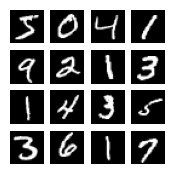

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(train_X[i,...], cmap='gray')
    plt.axis('off')
plt.show()

In [5]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [6]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [7]:
model.fit(train_X, train_y, batch_size=100, epochs=5)

Epoch 1/5
600/600 [==============================] - 2s 3ms/step - loss: 1.0963 - accuracy: 0.7139
Epoch 2/5
600/600 [==============================] - 1s 2ms/step - loss: 0.4737 - accuracy: 0.8673
Epoch 3/5
600/600 [==============================] - 2s 3ms/step - loss: 0.3807 - accuracy: 0.8911
Epoch 4/5
600/600 [==============================] - 2s 3ms/step - loss: 0.3360 - accuracy: 0.9036
Epoch 5/5
600/600 [==============================] - 2s 3ms/step - loss: 0.3058 - accuracy: 0.9121


In [9]:
model.save('mnist_model.keras')

In [10]:
from tensorflow.keras.models import load_model
model2 = load_model('mnist_model.keras')

In [11]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 360)               282600    
                                                                 
 dense_1 (Dense)             (None, 128)               46208     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 330098 (1.26 MB)
Trainable params: 330098 (1.26 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
pred = model2.predict(test_X)

313/313 [==============================] - 0s 978us/step


In [14]:
print(pred)

[[4.93135267e-05 8.82112181e-06 6.51320210e-04 ... 9.93814111e-01
  2.68693020e-05 7.44595716e-04]
 [1.02510089e-02 2.22817325e-04 8.39169800e-01 ... 1.89635994e-05
  4.24025813e-03 3.26774875e-06]
 [6.12935051e-04 9.59405065e-01 1.02024116e-02 ... 7.21935136e-03
  6.05775695e-03 2.62574782e-03]
 ...
 [1.40922373e-06 1.37073703e-05 2.35275947e-05 ... 3.94724077e-04
  6.61610812e-03 1.93574522e-02]
 [2.43527535e-03 6.50078151e-03 8.17096268e-04 ... 7.44729943e-04
  1.17642485e-01 1.72086421e-03]
 [3.13047094e-05 1.82612666e-07 7.00685487e-04 ... 2.45990122e-07
  2.11249858e-06 2.27911045e-07]]


In [15]:
import numpy as np
print(np.argmax(pred, axis=1))

[7 2 1 ... 4 5 6]


In [16]:
json_str = model.to_json()
print(json_str)

{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_input_shape": [null, 28, 28], "dtype": "float32", "sparse": false, "ragged": false, "name": "flatten_input"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Flatten", "config": {"name": "flatten", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 28, 28], "data_format": "channels_last"}, "registered_name": null, "build_config": {"input_shape": [null, 28, 28]}}, {"module": "keras.layers", "class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": "float32", "units": 360, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null,

In [19]:
import json
json_dic = json.loads(json_str)
with open("mnist_model.json",'w') as f:
    json.dump(json_dic, f, indent=4)

In [20]:
with open('mnist_model.json', 'r') as f:
    model_json = f.read()

In [21]:
print(model_json)

{
    "class_name": "Sequential",
    "config": {
        "name": "sequential",
        "layers": [
            {
                "module": "keras.layers",
                "class_name": "InputLayer",
                "config": {
                    "batch_input_shape": [
                        null,
                        28,
                        28
                    ],
                    "dtype": "float32",
                    "sparse": false,
                    "ragged": false,
                    "name": "flatten_input"
                },
                "registered_name": null
            },
            {
                "module": "keras.layers",
                "class_name": "Flatten",
                "config": {
                    "name": "flatten",
                    "trainable": true,
                    "dtype": "float32",
                    "batch_input_shape": [
                        null,
                        28,
                        28
                  

In [22]:
from tensorflow.keras.models import model_from_json
model3 = model_from_json(model_json)
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 360)               282600    
                                                                 
 dense_1 (Dense)             (None, 128)               46208     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 330098 (1.26 MB)
Trainable params: 330098 (1.26 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model3.compile(loss='sparse_categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [26]:
model3.fit(train_X, train_y, batch_size=100, epochs=3)

Epoch 1/3
600/600 [==============================] - 2s 2ms/step - loss: 1.0767 - accuracy: 0.7177
Epoch 2/3
600/600 [==============================] - 1s 2ms/step - loss: 0.4794 - accuracy: 0.8645
Epoch 3/3
600/600 [==============================] - 1s 2ms/step - loss: 0.3874 - accuracy: 0.8901


In [27]:
model3.evaluate(test_X, test_y)

313/313 [==============================] - 0s 1ms/step - loss: 0.3018 - accuracy: 0.9180


[0.30180221796035767, 0.9179999828338623]